In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [191]:
df = pd.read_csv(r"D:\zoz\supermarket_sales.csv")

In [192]:
df['Date'] = pd.to_datetime(df['Date'])

In [193]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [195]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


In [196]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [197]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [198]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [199]:
sales = df['Product line'].value_counts()

In [200]:
df.duplicated().sum()

np.int64(0)

In [201]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [202]:
df[['Product line','Unit price']].value_counts()

Product line            Unit price
Electronic accessories  26.26         2
Fashion accessories     99.82         2
                        22.32         2
Electronic accessories  52.89         2
Home and lifestyle      34.42         2
                                     ..
Sports and travel       98.13         1
                        98.40         1
                        98.80         1
                        99.24         1
Electronic accessories  19.32         1
Name: count, Length: 993, dtype: int64

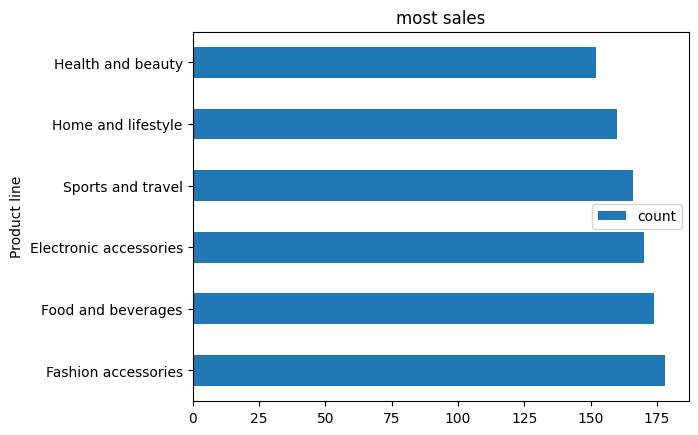

In [203]:
sales.plot(kind='barh',title='most sales')
plt.legend()
plt.show()

In [204]:
df['month'] = df['Date'].dt.strftime('%B')

In [212]:
monthly = df.month.value_counts()

In [208]:
df.reset_index(inplace=True)
df['month_no'] = pd.to_datetime(df['month'],format='%B').dt.month
df.sort_values('month_no',inplace=True)
df.set_index('month',inplace=False)
df.drop(columns=['index','month_no'],inplace=True)






<Axes: xlabel='month'>

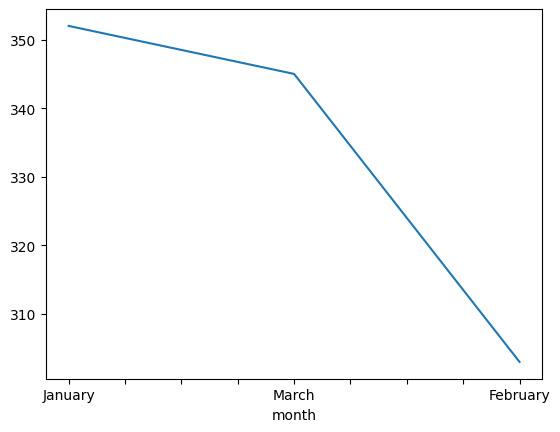

In [214]:
monthly.plot(kind='line')

In [210]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month
22,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,2019-01-28,12:43,Cash,702.63,4.761905,35.1315,4.5,January
21,577-34-7579,C,Naypyitaw,Member,Male,Food and beverages,50.49,9,22.7205,477.1305,2019-01-10,17:16,Cash,454.41,4.761905,22.7205,5.4,January
20,846-10-0341,A,Yangon,Normal,Female,Fashion accessories,42.57,7,14.8995,312.8895,2019-01-06,11:51,Cash,297.99,4.761905,14.8995,6.8,January
19,784-08-0310,C,Naypyitaw,Member,Female,Food and beverages,21.04,4,4.2080,88.3680,2019-01-13,13:58,Cash,84.16,4.761905,4.2080,7.6,January
18,305-89-2768,B,Mandalay,Member,Female,Home and lifestyle,21.90,3,3.2850,68.9850,2019-01-09,18:43,Ewallet,65.70,4.761905,3.2850,4.7,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8,March
658,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
657,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
656,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,March
